In [11]:
%reload_ext autoreload

%autoreload 2

In [12]:
from Libraries_functions import *
from tqdm import tqdm

## Cargar desde directorio

In [13]:
#esta funcion cargar los datos ya normalizados y modifica su shape para que se pueda usar en la red
inputs=load_form_dir("../../Datasets/Data/pruebas_numpy/")
targets=load_form_dir("../../Datasets/Data/pruebas_numpy/")

100%|██████████| 8/8 [00:00<00:00, 1598.67it/s]


mixed_numpy_1.npy


100%|██████████| 8/8 [00:00<00:00, 2665.59it/s]

mixed_numpy_1.npy


## normalización y lectura antigua

In [14]:
# inputs,targets=load_data("../../Datasets/Data/antiguosMel/data_funcional_[128,192].json")

#solo si leemos los datos de un json
# print("Selecciona si normalizar o no:")
# print("-Normalizar: 1")
# print("-No normalizar: 0")
# normalizar=input()
# if normalizar== 1:
#     for i in range(len(inputs)):
#         scalerX = MinMaxScaler()
#         inputs[i]=scalerX.fit_transform(inputs[i])

#     for i in range(len(targets)):
#         scalery = MinMaxScaler()
#         targets[i]=scalery.fit_transform(targets[i]) 



#solo si leemos jsons

# X = np.reshape(inputs, (np.shape(inputs)[0], np.shape(inputs)[1],np.shape(inputs)[2],1))
# y = np.reshape(targets, (np.shape(targets)[0], np.shape(targets)[1],np.shape(targets)[2],1))
 
# np.shape(X)


## División dataset y parámetros red

In [17]:
X_train, X_val, y_train, y_val = train_test_split(inputs,targets, test_size=0.2,random_state=42)

In [18]:
print("Shape de x_train:",np.shape(X_train),"shape de inputs:",np.shape(inputs))


Shape de x_train: (6, 256, 256, 1) shape de inputs: (8, 256, 256, 1)


In [28]:
ruta="./models/"
learning_rates = 0.0001
batch_hyper = 42
epoch_hyper= 3
loss_hyper="mae"
optimizer_hyper=tf.keras.optimizers.Adam
nombre=None
latent_space_dim=200
epsilonstd=1.0
alpha=0.1# si es para el complejo es alpha*kl_loss; si es para el normal es alpha+loss_mse
conc_x=-1

# Variational autoencoder

In [38]:
## create and comiple model

# model, nomber_modelo=build_VAE_skipp(X_train, latent_space_dim, epsilonstd, alpha, learning_rates)
model, nomber_modelo= build_VAE_Skipp_complejo(X_train, latent_space_dim, epsilonstd, alpha, learning_rates)
# model= build_vae_kk(X_train, latent_space_dim, epsilonstd, alpha)


Model: "decoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_92 (Conv2D)             (None, 256, 256, 64  640         ['input_6[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_93 (Conv2D)             (None, 128, 128, 64  36928       ['conv2d_92[0][0]']              
                                )                                                           

In [39]:
path="./models"
checkpoint = [callbacks.EarlyStopping(monitor='loss',patience=5,
restore_best_weights=True)#,callbacks.ModelCheckpoint(
#     path,
#     monitor="val_loss",
#     verbose=1,
#     save_best_only=True,
#     mode="min"
# )
]

In [44]:
history=model.fit(
X_train,
y_train,
epochs=epoch_hyper,
batch_size=batch_hyper,
validation_data=(X_val, y_val),
verbose=1,
shuffle=False,
callbacks=[checkpoint]
)



Train on 6 samples, validate on 2 samples
Epoch 1/3
6/6 [==============================] - 3s 517ms/sample - loss: 0.0148 - val_loss: 0.0136
Epoch 2/3
6/6 [==============================] - 3s 507ms/sample - loss: 0.0142 - val_loss: 0.0133
Epoch 3/3
6/6 [==============================] - 3s 512ms/sample - loss: 0.0138 - val_loss: 0.0133


In [41]:
nombre=f"{nomber_modelo}_loss_{round(history.history['loss'][-1],1)}_alpha_{alpha}_dim_{latent_space_dim}"

In [62]:
# Guardar configuración JSON en el disco
# json_config = model.to_json()
# with open('./model_config.json', 'w') as json_file:
#     json_file.write(json_config)
# Guardar pesos en el disco
model.save_weights(f'./VAE_weights_{nombre}.h5')

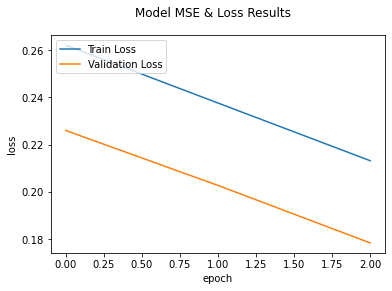

In [63]:
plot_accuracy_loss(history,nombre)

## Variational autoencoder con bottleneck bien implementado

In [ ]:
autoencoder_ = VAE(
        input_shape=(inputs.shape[1],inputs.shape[2],1),
        # input_shape=(256,64,1),
        conv_filters=(512, 256, 128, 64, 32),
        conv_kernels=(3, 3, 3, 3, 3),
        conv_strides=(2, 2, 2, 2,(2,1)),
        latent_space_dim=latent_space_dim
    ) 
autoencoder_.summary()
autoencoder_.compile(learning_rates)

In [ ]:

history=autoencoder_.train(X_train,y_train,X_val,y_val,batch_hyper,epoch_hyper)

In [ ]:
autoencoder_.save(learning_rates,batch_hyper,epoch_hyper,latent_space_dim,ruta)
plot_accuracy_loss(history,nombre)